<a href="https://colab.research.google.com/github/vishal26scalerite/Mydatascienceprojects/blob/main/Case_Study_By_Vishal_Sharma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Jamboree Education - Linear Regression

The aim of this case study is to analyze the features of the dataset given and see if we are able to fit a Linear Regression model on top of it to make predictions regarding the chances of a student getting admission into Ivy League Colleges and evaluate the performance.

In [ ]:
import pandas as pd, seaborn as sns, matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Splitting the Dataset

In [ ]:
X = df.iloc[:, 1:-1] # Features
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [ ]:
y = df.iloc[:, -1] # Target Variable
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=45)

In [ ]:
X_train.info() # Training Data (Features)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 484 to 459
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 25.0 KB


### Exploratory Data Analysis on Training Data

In [ ]:
X_train.describe() # Checking the Central Tendency of all features

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
count,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000
mean,315.987500,106.895000,3.085000,3.338750,3.47125,8.55135,0.547500
std,11.134284,5.947892,1.153734,0.992894,0.92028,0.60156,0.498362
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.80000,0.000000
25%,308.000000,102.000000,2.000000,2.500000,3.00000,8.12000,0.000000
50%,316.000000,107.000000,3.000000,3.500000,3.50000,8.54000,1.000000
75%,324.000000,111.000000,4.000000,4.000000,4.00000,9.01250,1.000000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.92000,1.000000


In [ ]:
X_train.isnull().any() # Checking Null Values

GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
dtype: bool

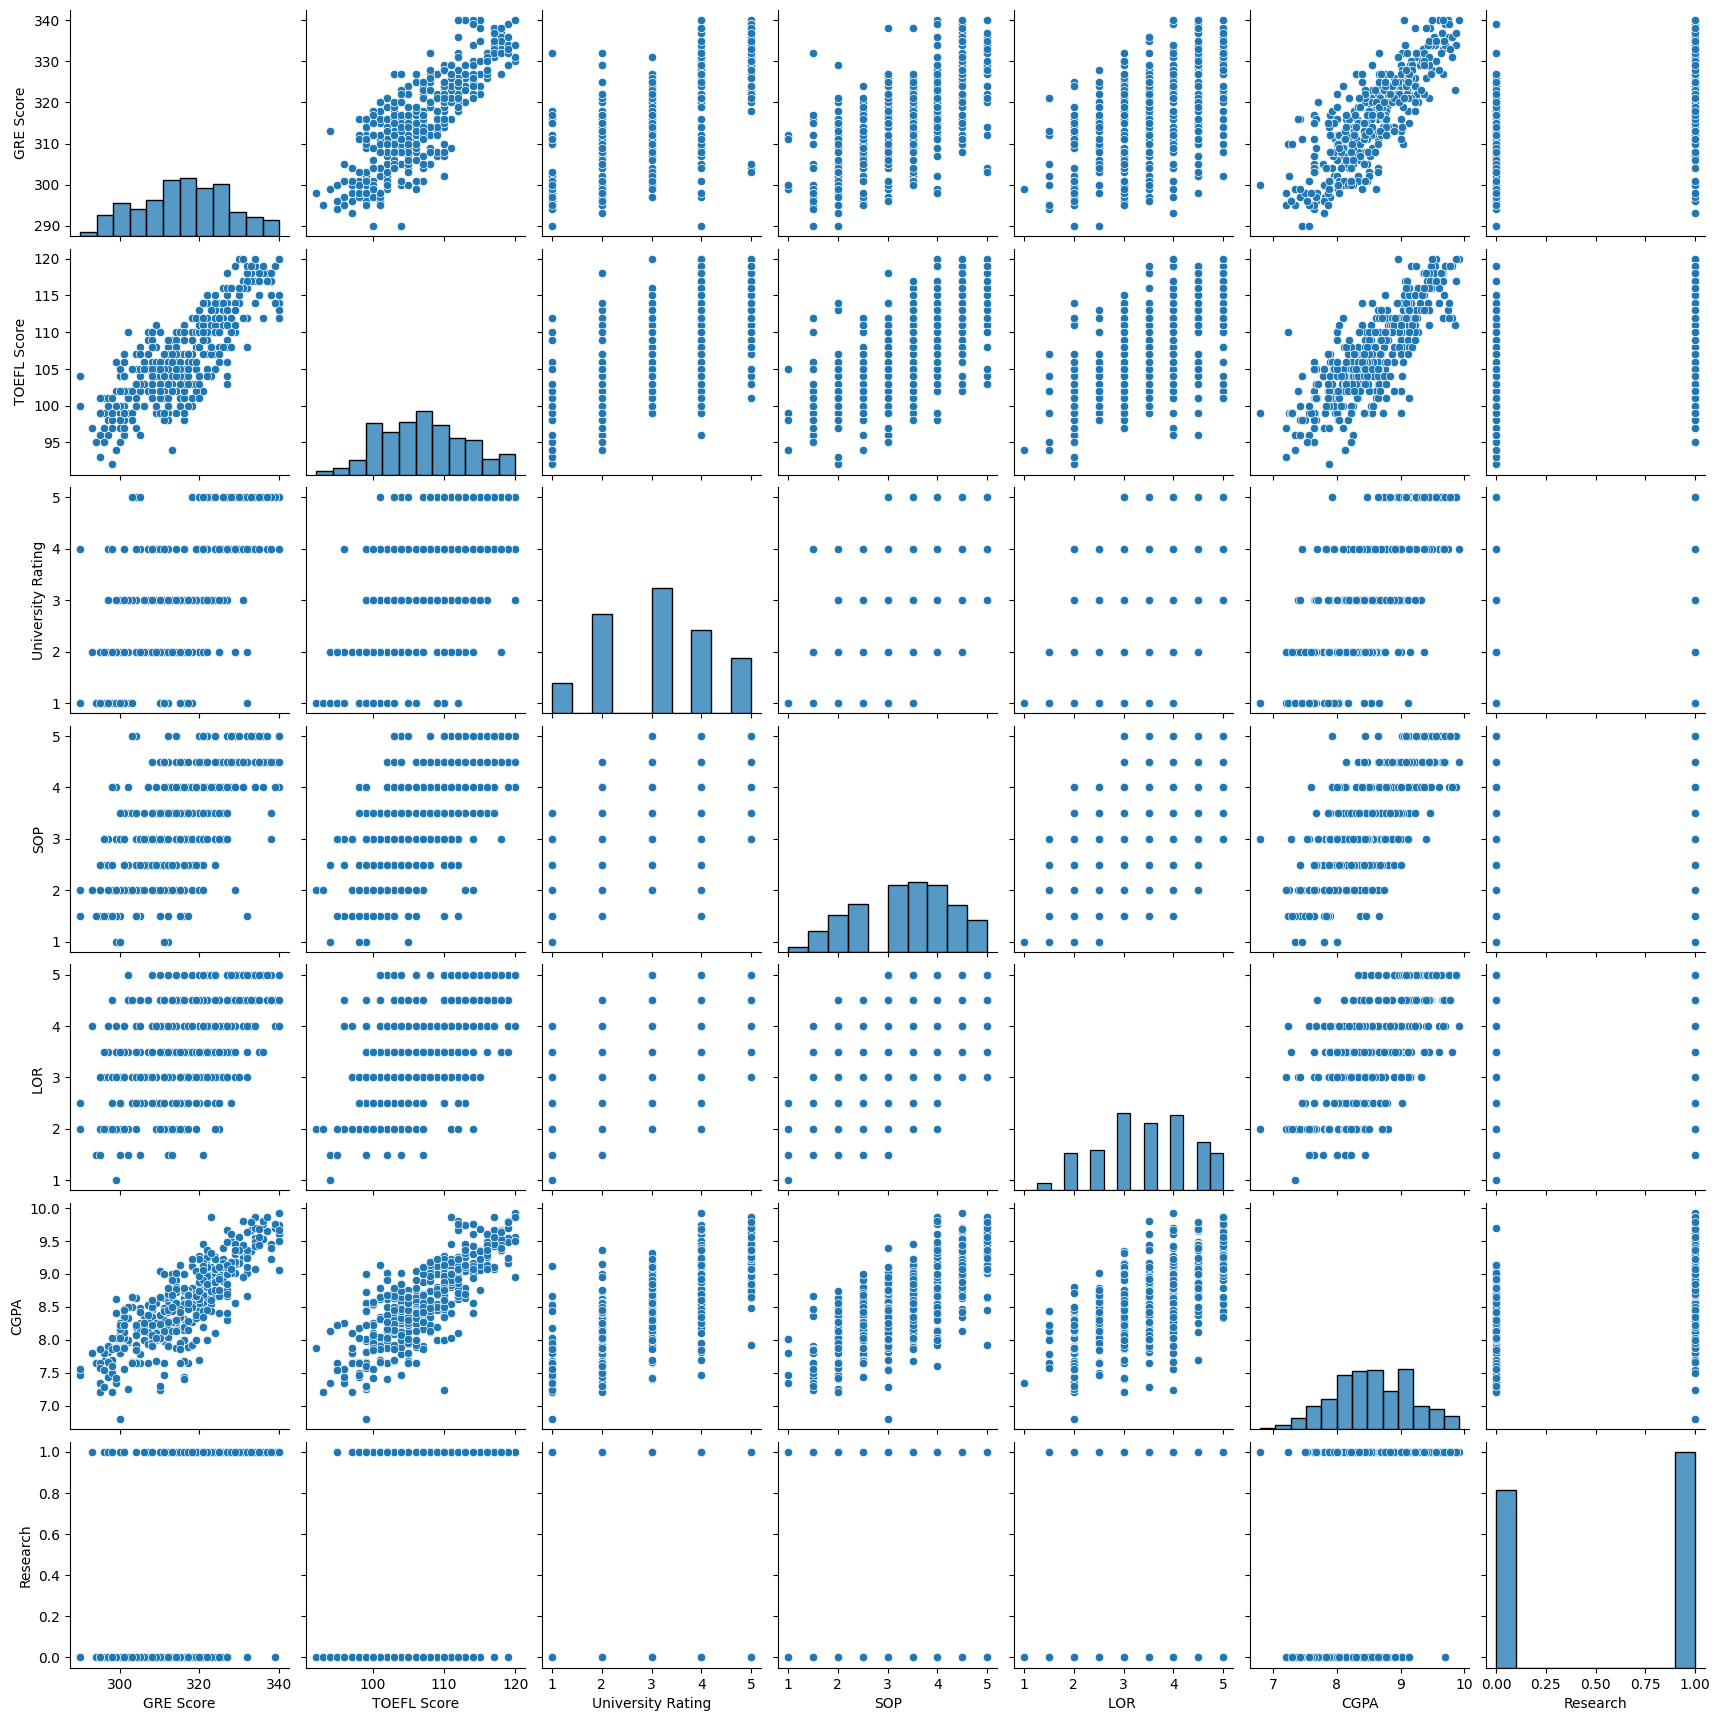

In [ ]:
sns.pairplot(data= X_train); # Visual Inspection of Features (Univariate and Correlation)

Observations from Pairplot:

1. Distributions of GRE, TOEFL and CGPA seem to be Normal Distribution (with high variance in GRE and TOEFL but relatively less variance in CGPA).

2. GRE, TOEFL and CGPA are all positively correlated.

3. Students with University Ratings 4 and 5 are scoring more in GRE, TOEFL and CGPA.

4. Students scoring high in GRE, TOEFL or CGPA have strong SOP and LOR.

5. More students who have scored high in GRE, TOEFL or CGPA prefer Research more than the ones who scored relatively low.



### Correlation among the features of the Dataset

In [ ]:
X_train.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.824458,0.615821,0.600020,0.528898,0.826935,0.531495
TOEFL Score,0.824458,1.000000,0.655053,0.631371,0.552327,0.800395,0.459954
University Rating,0.615821,0.655053,1.000000,0.730705,0.625475,0.700211,0.385261
SOP,0.600020,0.631371,0.730705,1.000000,0.677201,0.718925,0.386529
LOR,0.528898,0.552327,0.625475,0.677201,1.000000,0.639308,0.359553
CGPA,0.826935,0.800395,0.700211,0.718925,0.639308,1.000000,0.469530
Research,0.531495,0.459954,0.385261,0.386529,0.359553,0.469530,1.000000


### Scaling the Data Using MinMax Scaler

In [ ]:
scaler = MinMaxScaler()
X1_train, X1_test= pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns), pd.DataFrame(scaler.fit_transform(X_test), columns= X_train.columns)


### Fitting the Linear Regression Model from StatsModels

In [ ]:
import statsmodels.api as sm


# Add a constant term to the independent variables (for the intercept)
X1_train_with_const = sm.add_constant(X_train)

# Fit the linear regression model
model = sm.OLS(y_train, X1_train_with_const)

# Perform the fitting
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     243.8
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          1.51e-138
Time:                        20:01:09   Log-Likelihood:                 554.78
No. Observations:                 400   AIC:                            -1094.
Df Residuals:                     392   BIC:                            -1062.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.2487      0.11

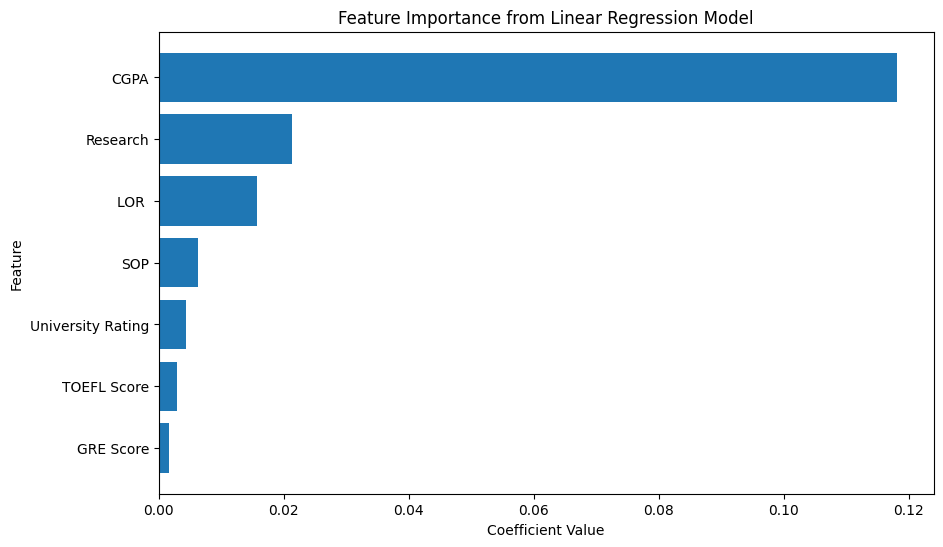

In [ ]:
coefficients = results.params[1:]  # Exclude the intercept
feature_names = X1_train.columns

# Sort coefficients by absolute value
sorted_indices = np.argsort(np.abs(coefficients))
sorted_coefficients = coefficients[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot the bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_coefficients)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_coefficients)), sorted_feature_names)
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance from Linear Regression Model')
plt.show()

In [ ]:
results.params[0] # Intercept

-1.2486548777175739

### Making Predictions from the model and calculating MAE and MSE

In [ ]:
y_pred = results.predict(sm.add_constant(X1_test))
residuals = y_test - y_pred
mae = np.mean(np.abs(residuals))
mse = np.mean(residuals**2)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)


Mean Absolute Error (MAE): 1.840715420992734
Mean Squared Error (MSE): 3.4191204401653663


### Calculating VIF for each independent variable

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X1_train.values, i) for i in range(X1_train.shape[1])]
vif["features"] = X1_train.columns
print(vif)

   VIF Factor           features
0   28.486627          GRE Score
1   27.239598        TOEFL Score
2   10.694585  University Rating
3   18.995402                SOP
4   15.348374               LOR 
5   41.032796               CGPA
6    3.091263           Research


### Checking Homoscedasticity

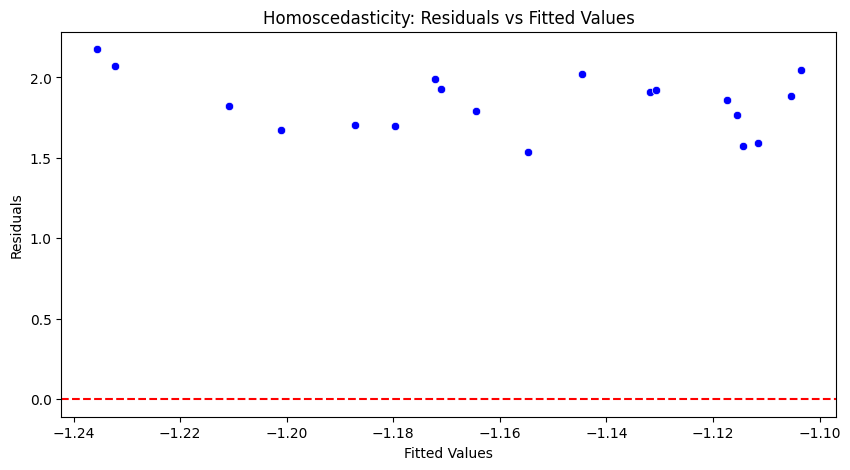

In [ ]:

plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_pred, y=residuals, color='blue')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0
plt.title('Homoscedasticity: Residuals vs Fitted Values');

### Normality of Residuals

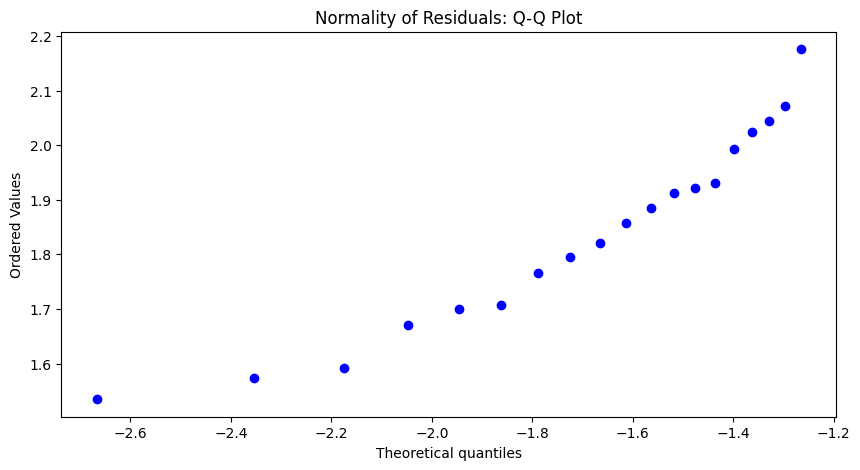

In [ ]:
from scipy import stats
plt.figure(figsize=(10, 5))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Normality of Residuals: Q-Q Plot')
plt.show()

### R2 Score and Adjusted R2 Score

In [ ]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)

# Calculate the number of observations and number of independent variables
n = len(y_test)
p = X_test.shape[1]

# Calculate adjusted R-squared score on the test data
adj_r2_test = 1 - (1 - r2_test) * ((n - 1) / (n - p - 1))

print("R-squared (R2) score on test data:", r2_test)
print("Adjusted R-squared (R2) score on test data:", adj_r2_test)

R-squared (R2) score on test data: -175.47747308449294
Adjusted R-squared (R2) score on test data: -188.90510690613914


### Model Evaluation and Recommendations:

1. The model performed poorly on Test Data, R2_Score was in negative. Its a case of underfitting. We can consider using Polynomial regression and Regularisation to make a Power Model.

2. Various Assumptions for Linear Regression such as Multicolinearity, Homoscedasticity, Normality of Residuals and Linearity weren't met. We need to ensure the quality of the data and consider to perform a transformation on the features so that it can perform better.

3. Features such as GRE, TOEFL and University Rating had low importance, these could be the reason that our model didn't do well. We can consider to drop them.

4. CGPA and Research had high importance. We need to focus on these features.

